# Image Viewer

指定したディレクトリ内にある画像を並べて表示するノートブックです。

In [1]:
# 画像のあるディレクトリ
IMAGE_DIR = '/workspace/image/raw/kinoko/'

# このノートブックで画像を表示する際の縦横サイズ
CROP_SIZE = 50

In [2]:
import os
import glob
from PIL import Image

In [3]:
# 拡張子が jpg のファイルの一覧を images リストに格納
images = glob.glob(os.path.join(IMAGE_DIR, '*.jpg'))

In [4]:
# 画像を中心に正方形に切り抜き
def crop(image, size):
    im = Image.open(image)
    w = im.width
    h = im.height
    p = (w - h) / 2
    box = (p, 0, p+h, h)
    return im.crop(box).resize((size, size))

In [5]:
# 枠を作成。一行の枚数を width で与えています。
width = 10
height = int(len(images) / width) + 1
frame = Image.new('RGB', (CROP_SIZE * width, CROP_SIZE * height), color=(255,255,255))

In [6]:
# 枠内に画像を配置
for i in range(len(images)):
    img = crop(images[i], CROP_SIZE)
    x = CROP_SIZE * (i % width)
    y = CROP_SIZE * int(i / width)
    frame.paste(img, (x, y))

### 画像を並べて表示

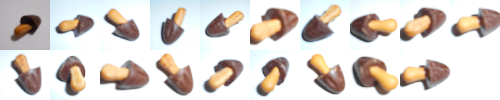

In [7]:
frame